In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

In [3]:

data=pd.read_csv('BTC-USD.csv',parse_dates=["Date"],sep=',')

#convert dates from string to datetime objects
data["Date"]=pd.to_datetime(data["Date"])

#keep only the date part of datetime object
data["Date"]=data["Date"].dt.date

#drop the nan values
data.isna().sum()
data.dropna(axis=0,how='any',inplace=True)
data.isna().sum()


#change volume to integer
#data["Volume"]=data["Volume"].astype('int64')


data.shape









(1823, 7)

# Preprocessing

### Testing for multicollinearity
Running the cell we see the close relationship btw Close and Adj Close

Add a dummy variable for time

In [4]:
data['Time_dummy']=np.arange(len(data.index))
data['Time_dummy']=data['Time_dummy'].astype('float64')
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Time_dummy
0,2016-12-13,780.646973,788.460022,777.961975,780.556030,780.556030,81645600.0,0.0
1,2016-12-14,780.005005,782.033997,776.838989,781.481018,781.481018,75979000.0,1.0
2,2016-12-15,780.070007,781.434998,777.802002,778.088013,778.088013,81580096.0,2.0
3,2016-12-16,778.963013,785.031982,778.963013,784.906982,784.906982,83608200.0,3.0
4,2016-12-17,785.166016,792.508972,784.864014,790.828979,790.828979,78989800.0,4.0
5,2016-12-18,791.007996,794.737000,788.026001,790.530029,790.530029,60524400.0,5.0
6,2016-12-19,790.692017,793.611023,790.320007,792.713989,792.713989,74886400.0,6.0
7,2016-12-20,792.247009,801.336975,791.497009,800.875977,800.875977,99629296.0,7.0
8,2016-12-21,800.643982,834.281006,799.405029,834.281006,834.281006,155576000.0,8.0
9,2016-12-22,834.179993,875.781982,834.148987,864.539978,864.539978,200027008.0,9.0


In [5]:
prepro=preprocessing.MinMaxScaler()
data_float=data.loc[:, data.dtypes=='float64']
data_scaled=pd.DataFrame(prepro.fit_transform(data_float), index=data_float.index,columns=data_float.columns)
data_scaled

,Open,High,Low,Close,Adj Close,Volume,Time_dummy
0,0.000082,0.000103,0.000338,0.000042,0.000042,0.000060,0.000000
1,0.000072,0.000009,0.000321,0.000056,0.000056,0.000044,0.000549
2,0.000073,0.000000,0.000336,0.000005,0.000005,0.000060,0.001098
3,0.000057,0.000053,0.000354,0.000107,0.000107,0.000066,0.001647
4,0.000150,0.000163,0.000444,0.000196,0.000196,0.000053,0.002195
...,...,...,...,...,...,...,...
1822,0.743920,0.735437,0.710121,0.702126,0.702126,0.084190,0.997805
1823,0.701869,0.723940,0.705021,0.695706,0.695706,0.088073,0.998353
1824,0.696215,0.715749,0.703782,0.727436,0.727436,0.073282,0.998902
1825,0.727518,0.734374,0.730958,0.738453,0.738453,0.062349,0.999451


##### This relationship is also verified by this:

In [6]:
data_duplicate=data_scaled.T.duplicated()
print(data_duplicate)

#drop tha adj close column but keep the same dataframe
data_scaled.drop(["Adj Close"],axis=1,inplace=True)
print(data_scaled.head(10))

Open          False
High          False
Low           False
Close         False
Adj Close      True
Volume        False
Time_dummy    False
dtype: bool
       Open      High       Low     Close    Volume  Time_dummy
0  0.000082  0.000103  0.000338  0.000042  0.000060    0.000000
1  0.000072  0.000009  0.000321  0.000056  0.000044    0.000549
2  0.000073  0.000000  0.000336  0.000005  0.000060    0.001098
3  0.000057  0.000053  0.000354  0.000107  0.000066    0.001647
4  0.000150  0.000163  0.000444  0.000196  0.000053    0.002195
5  0.000237  0.000196  0.000492  0.000191  0.000000    0.002744
6  0.000232  0.000179  0.000527  0.000224  0.000041    0.003293
7  0.000256  0.000293  0.000545  0.000346  0.000111    0.003842
8  0.000381  0.000777  0.000665  0.000846  0.000271    0.004391
9  0.000884  0.001387  0.001195  0.001299  0.000398    0.004940


#### Split the data in training and test

In [7]:
from sklearn.model_selection import train_test_split
x=data_scaled[['Volume', 'Time_dummy']]
y=data_scaled['Close']
# print(x.head)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=5849)

from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data-75% of the dataset
LR.fit(x_train,y_train)
print("coefficients are: ", LR.coef_)
print(" Intercept is :", LR.intercept_)

#predicting using the x_test
y_hat=pd.Series(LR.predict(x_test),index=x_test["Volume"].index)

coefficients are:  [1.08605647 0.48462934]
 Intercept is : -0.0936049726127744


In [8]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score=r2_score(y_test,y_hat)
print('r2 score is: ', score)
print('mean s error is   ',mean_squared_error(y_test,y_hat))
print('root mean squared error is==',np.sqrt(mean_squared_error(y_test,y_hat)))

r2 score is:  0.606945461538819
mean s error is    0.024441248966826944
root mean squared error is== 0.15633697248836229


Text(0.5, 1.0, 'Linear Regression on Volume and Time')

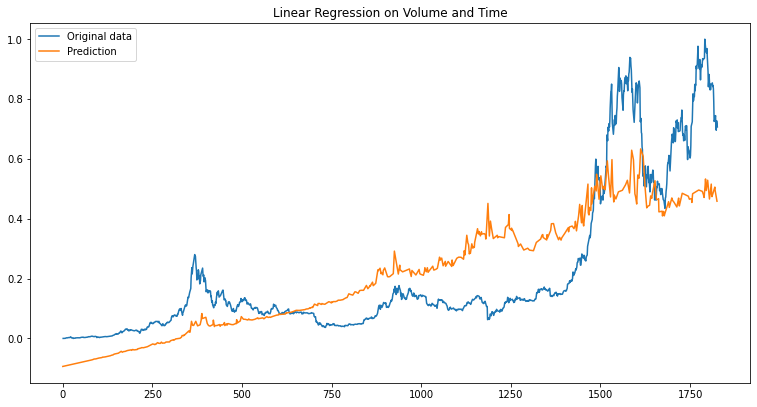

In [9]:
# y_train_plot=y_train.to_numpy()
# x_train_plot=y_train.to_numpy()
# y_hat_plot=y_hat.to_numpy()

# print(y_hat_plot[:5])
# print(y_train_plot[:5])

y_train.sort_index(inplace=True)
y_hat.sort_index(inplace=True)
fig1=plt.figure(figsize=(10,5))
ax1=fig1.add_axes([0,0,1,1])
ax1.plot(y_train, label="Original data")
ax1.plot(y_hat, label="Prediction")
ax1.legend()
ax1.set_title("Linear Regression on Volume and Time")

#can i get a perfectly straight line because of regression???





In [43]:
from sklearn.model_selection import train_test_split
x=data_scaled[['Open','Volume', 'Time_dummy']]
y=data_scaled['Close']
# print(x.head)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=5849)

from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data-75% of the dataset
LR.fit(x_train,y_train)
print("coefficients are: ", LR.coef_)
print(" Intercept is :", LR.intercept_)

#predicting using the x_test
y_hat=pd.Series(LR.predict(x_test),index=x_test["Volume"].index)

coefficients are:  [ 0.99926413 -0.02420831  0.00496101]
 Intercept is : -0.0006948365037299231


In [44]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score=r2_score(y_test,y_hat)
print('r2 score is: ', score)
print('mean s error is   ',mean_squared_error(y_test,y_hat))
print('root mean squared error is==',np.sqrt(mean_squared_error(y_test,y_hat)))

r2 score is:  0.9974500541269519
mean s error is    0.00015856288590154036
root mean squared error is== 0.012592175582540943


Text(0.5, 1.0, 'Linear Regression of Close Price on Volume Time and Open')

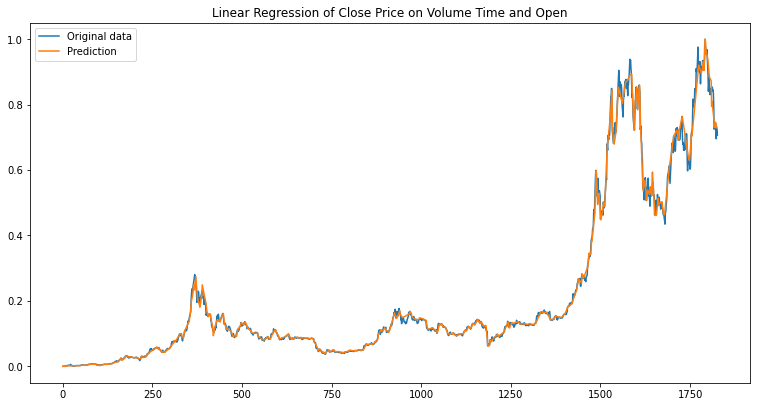

In [46]:

y_train.sort_index(inplace=True)
y_hat.sort_index(inplace=True)
fig1=plt.figure(figsize=(10,5))
ax1=fig1.add_axes([0,0,1,1])
ax1.plot(y_train, label="Original data")
ax1.plot(y_hat, label="Prediction")
ax1.legend()
ax1.set_title("Linear Regression of Close Price on Volume Time and Open")

# LAGS

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

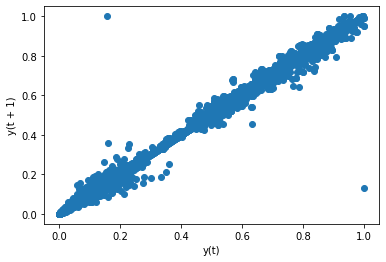

In [47]:
from pandas.plotting import lag_plot,autocorrelation_plot
lag_plot(data_scaled)


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

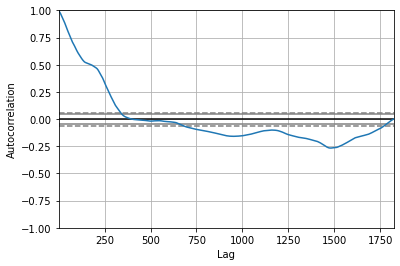

In [12]:
pd.plotting.autocorrelation_plot(data_scaled["Close"])

c:\Users\pchrk\OneDrive\Desktop\cs\3rd\ml\ml-env\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


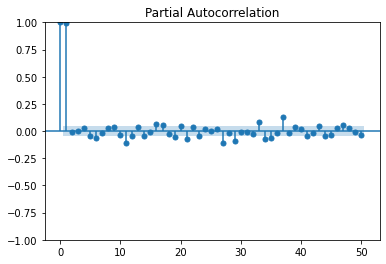

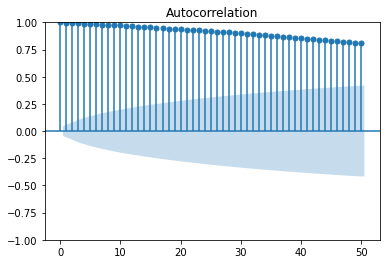

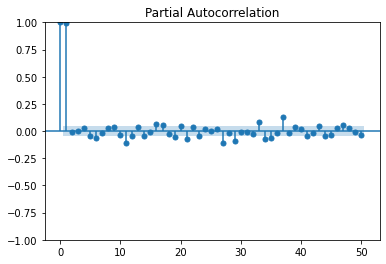

In [13]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(data_scaled["Close"], lags=50)
plot_pacf(data_scaled["Close"],lags=50)

##### Από τα παραπάνω διαγράμματα διαπιστώνουμε την ύπαρξη αυτοσυσχέτισης στις τιμές της μεταβλητής Close. Ειδικότερα, η σημαντικότητα του lag μικραίνει όσο απομακρυνόμαστε χρονικά από τη δεδομένη χρονική στιγμή. Το υπόδειγμα AR που θα χρησιμοποιήσουμε ουσιαστικά αποτελεί μια γραμμική παλινδρόμηση χρησιμοποιώντας σαν ερμηνευτικές μεταβλητές προηγούμενες παρατηρήσεις της ελέυθερης μεταβλητής (Close price).
##### Από το διάγραμμα μερικής αυτοσυσχέτισης PACF διαπιστώνουμε πως το lag1 είναι το πιο σημαντικό γύρω από το οποίο θα χτίσουμε το υποδειγμά μας.

In [14]:
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.stattools import adfuller

In [15]:
stationarityTest=adfuller(data["Close"])

Κάνουμε χρήση της συνάρτησης ar_select_order και αφήνουμε το πακέτο να επιλέξει τον βέλτιστο αριθμό lag που είναι μονο η προηγούμενη παρατήρηση.

Θα χρησιμοποιήσουμε το μοντέλο AR(1) για να δοκιμάσουμε πόσο καλές προβλέψεις κάνει.

c:\Users\pchrk\OneDrive\Desktop\cs\3rd\ml\ml-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 1723
Model:                     AutoReg(3)   Log Likelihood                5154.387
Method:               Conditional MLE   S.D. of innovations              0.012
Date:                Thu, 20 Jan 2022   AIC                         -10298.775
Time:                        16:13:41   BIC                         -10271.524
Sample:                             3   HQIC                        -10288.693
                                 1723                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.041      0.298      -0.000       0.001
Close.L1       0.9419      0.024     39.162      0.000       0.895       0.989
Close.L2       0.1292      0.033      3.924      0.0

c:\Users\pchrk\OneDrive\Desktop\cs\3rd\ml\ml-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\Users\pchrk\OneDrive\Desktop\cs\3rd\ml\ml-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
c:\Users\pchrk\OneDrive\Desktop\cs\3rd\ml\ml-env\lib\site-packages\statsmodels\tsa\deterministic.py:157: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


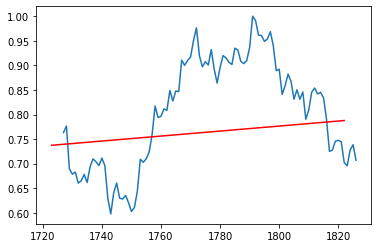

In [16]:
ar1_train_data,ar1_test_data=data_scaled["Close"].iloc[:len(data_scaled)-100],data_scaled["Close"].iloc[len(data_scaled)-100:]

optimal_ar_model=ar_select_order(ar1_train_data,maxlag=30)
optimal_ar_model_fitted=optimal_ar_model.model.fit()
print(optimal_ar_model_fitted.summary())
print("Optimal number of lags is %s" % optimal_ar_model_fitted.ar_lags)
ar1_predictions=optimal_ar_model_fitted.predict(start=len(ar1_train_data),end=len(ar1_train_data)+len(ar1_test_data)-1)
for i in range(len(ar1_predictions)):
    print('predicted=%f, expected=%f' %(ar1_predictions.iloc[i],ar1_test_data.iloc[i]))
rmse=mean_squared_error(ar1_test_data,ar1_predictions)
rmse_root=np.sqrt(rmse)
print("mean squared error is: %.3f and root is %.3f" %(rmse,rmse_root))

plt.plot(ar1_test_data)
plt.plot(ar1_predictions, color='red')




                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                   20
Model:                     AutoReg(3)   Log Likelihood                 -74.655
Method:               Conditional MLE   S.D. of innovations             19.541
Date:                Thu, 20 Jan 2022   AIC                            159.310
Time:                        16:13:41   BIC                            163.476
Sample:                             3   HQIC                           159.724
                                   20                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.7121     59.459      0.365      0.715     -94.826     138.250
Close.L1       1.1524      0.242      4.761      0.000       0.678       1.627
Close.L2      -0.4424      0.365     -1.212      0.2

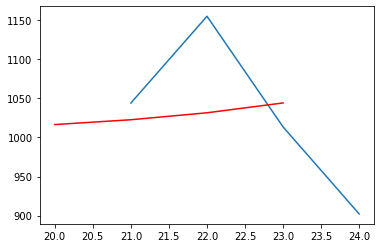

In [17]:

X=data["Close"][:100]
X_test=X[21:25]
X_train=X[:20]


# optimal_ar_model=ar_select_order(X_train,maxlag=30)
optimal_ar_model=AutoReg(X_train, lags=3)
model_fitted=optimal_ar_model.fit()
print(model_fitted.summary())
print("Optimal number of lags is %s" % model_fitted.ar_lags)
predictions=model_fitted.predict(start=len(X_train),end=len(X_train)+len(X_test)-1)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' %(predictions.iloc[i],X_test.iloc[i]))
rmse=mean_squared_error(X_test,predictions)
rmse_root=np.sqrt(rmse)
print("mean squared error is: %.3f and root is %.3f" %(rmse,rmse_root))

plt.plot(X_test)
plt.plot(predictions, color='red')


In [18]:

pd.plotting.register_matplotlib_converters()
ar_data=data[["Date","Close"]]
ar_data['Change']=ar_data["Close"].pct_change().fillna(0)
ar_data.loc[ar_data['Change']==0]







ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,Close,Change
0,2016-12-13,780.556030,0.0
77,2017-02-28,1179.969971,0.0


Only one day in our data has 0 percent change. We will drop them and keep the rest to train our model

In [19]:
id=ar_data.loc[ar_data['Change']==0].index
ar_data.drop(id,axis=0, inplace=True)
ar_data.shape

c:\Users\pchrk\OneDrive\Desktop\cs\3rd\ml\ml-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(1821, 3)

Add column ("Up down") that spots if there is a positive or negative change in close price

In [20]:
ar_data["Up-Down"]=(ar_data["Change"]>0).astype(int)
ar_data

ipykernel_launcher:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,Close,Change,Up-Down
1,2016-12-14,781.481018,0.001185,1
2,2016-12-15,778.088013,-0.004342,0
3,2016-12-16,784.906982,0.008764,1
4,2016-12-17,790.828979,0.007545,1
5,2016-12-18,790.530029,-0.000378,0
...,...,...,...,...
1822,2021-09-12,47672.121090,-0.056087,0
1823,2021-10-12,47243.304690,-0.008995,0
1824,2021-11-12,49362.507810,0.044857,1
1825,2021-12-12,50098.335940,0.014907,1


c:\Users\pchrk\OneDrive\Desktop\cs\3rd\ml\ml-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                            AutoReg Model Results                             
Dep. Variable:                 Change   No. Observations:                 1721
Model:                     AutoReg(0)   Log Likelihood                3002.670
Method:               Conditional MLE   S.D. of innovations              0.042
Date:                Thu, 20 Jan 2022   AIC                          -6001.339
Time:                        16:13:43   BIC                          -5990.438
Sample:                             0   HQIC                         -5997.306
                                 1721                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0033      0.001      3.259      0.001       0.001       0.005
Optimal number of lags is None
predicted=0.003321, expected=0.036216
predicted=0.003321, expected=0.017006
predicted=0.003321, expe

c:\Users\pchrk\OneDrive\Desktop\cs\3rd\ml\ml-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\Users\pchrk\OneDrive\Desktop\cs\3rd\ml\ml-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
c:\Users\pchrk\OneDrive\Desktop\cs\3rd\ml\ml-env\lib\site-packages\statsmodels\tsa\deterministic.py:157: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


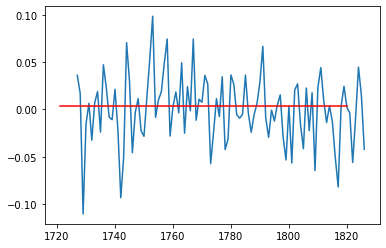

In [21]:
ar1_train_data,ar1_test_data=ar_data["Change"].iloc[:len(ar_data)-100],ar_data["Change"].iloc[len(ar_data)-100:]

optimal_ar_model=ar_select_order(ar1_train_data,maxlag=30)
optimal_ar_model_fitted=optimal_ar_model.model.fit()
print(optimal_ar_model_fitted.summary())
print("Optimal number of lags is %s" % optimal_ar_model_fitted.ar_lags)
ar1_predictions=optimal_ar_model_fitted.predict(start=len(ar1_train_data),end=len(ar1_train_data)+len(ar1_test_data)-1)
for i in range(len(ar1_predictions)):
    print('predicted=%f, expected=%f' %(ar1_predictions.iloc[i],ar1_test_data.iloc[i]))
rmse=mean_squared_error(ar1_test_data,ar1_predictions)
rmse_root=np.sqrt(rmse)
print("mean squared error is: %.3f and root is %.3f" %(rmse,rmse_root))

plt.plot(ar1_test_data)
plt.plot(ar1_predictions, color='red')


MANUAL LINEAR REGRESSION AR(1)
$Y_{t}=b_{0}+b1x_{t-1}$

Test score is  4598.577


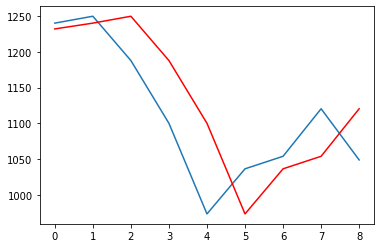

In [22]:
df=data["Close"]
df=pd.concat([df.shift(1),df],axis=1)
df.columns=['t-1 Close', 't Close']
X=df.values
train,test=X[1:90],X[91:100]
X_tr=train[:,0]
Y_tr=train[:,1]
X_te=test[:,0]
Y_te=test[:,1]


def persistence_model(X):
    return X


predictions=list()
for x in X_te:
    y_hat=persistence_model(x)
    predictions.append(y_hat)
test_score= mean_squared_error(Y_te,predictions)
print("Test score is  %.3f" % test_score)

plt.plot(Y_te)
plt.plot(predictions, color='red')


In [23]:
#Computing the log difference
ar_data["Log Difference"]=np.log(ar_data["Close"])
ar_data["Log Difference"]=ar_data["Log Difference"].diff()
ar_data

ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,Close,Change,Up-Down,Log Difference
1,2016-12-14,781.481018,0.001185,1,NaN
2,2016-12-15,778.088013,-0.004342,0,-0.004351
3,2016-12-16,784.906982,0.008764,1,0.008726
4,2016-12-17,790.828979,0.007545,1,0.007517
5,2016-12-18,790.530029,-0.000378,0,-0.000378
...,...,...,...,...,...
1822,2021-09-12,47672.121090,-0.056087,0,-0.057722
1823,2021-10-12,47243.304690,-0.008995,0,-0.009036
1824,2021-11-12,49362.507810,0.044857,1,0.043880
1825,2021-12-12,50098.335940,0.014907,1,0.014797


In [24]:
ar_data=ar_data.dropna().reset_index(drop=True)
ar_data

,Date,Close,Change,Up-Down,Log Difference
0,2016-12-15,778.088013,-0.004342,0,-0.004351
1,2016-12-16,784.906982,0.008764,1,0.008726
2,2016-12-17,790.828979,0.007545,1,0.007517
3,2016-12-18,790.530029,-0.000378,0,-0.000378
4,2016-12-19,792.713989,0.002763,1,0.002759
...,...,...,...,...,...
1815,2021-09-12,47672.121090,-0.056087,0,-0.057722
1816,2021-10-12,47243.304690,-0.008995,0,-0.009036
1817,2021-11-12,49362.507810,0.044857,1,0.043880
1818,2021-12-12,50098.335940,0.014907,1,0.014797


Text(0.5, 1.0, 'Change of CLosing Price')

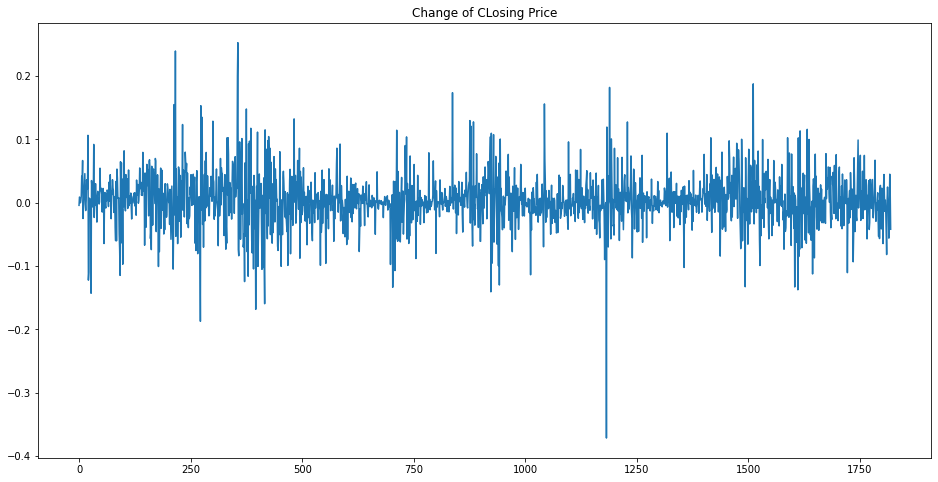

In [25]:
plt.figure(figsize=(16,8))
plt.plot(ar_data["Change"])
#plt.plot(ar_data["Log Difference"], color='red')
plt.title("Change of CLosing Price")

Text(0.5, 1.0, 'Log difference of CLosing Price')

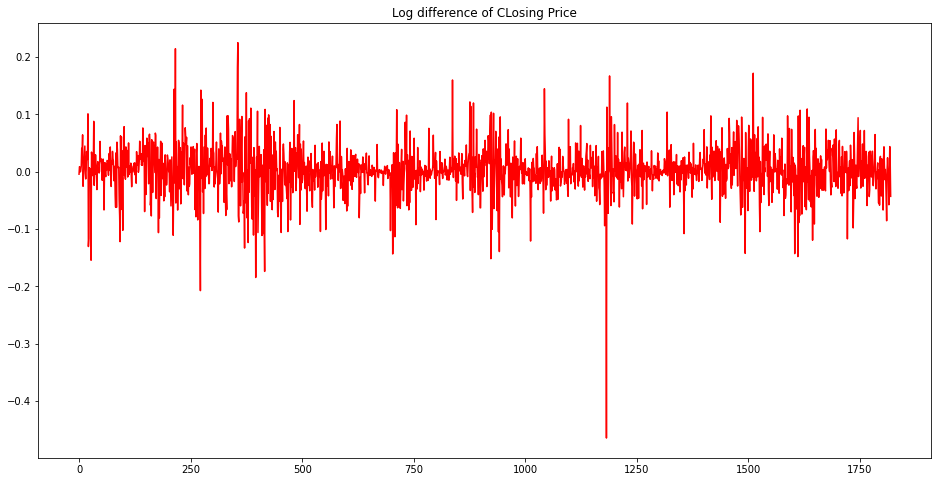

In [26]:
plt.figure(figsize=(16,8))
plt.plot(ar_data["Log Difference"], color='red')
plt.title("Log difference of CLosing Price")

In [27]:
adf_change=adfuller(ar_data["Change"])
print('ADF statistic for pct change %f ' %adf_change[0] )
print('p-value for pct change %f ' %adf_change[1] )

ADF statistic for pct change -43.756606 
p-value for pct change 0.000000 


In [28]:
adf_change=adfuller(ar_data["Log Difference"].iloc[1:])
print('ADF statistic for pct change %f ' %adf_change[0] )
print('p-value for pct change %f ' %adf_change[1] )

ADF statistic for pct change -29.559835 
p-value for pct change 0.000000 


For large enough and negative adf values(43) we reject null hypothesis and out time series is stationary
We choose percent change as it behaves better for stationarity

c:\Users\pchrk\OneDrive\Desktop\cs\3rd\ml\ml-env\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


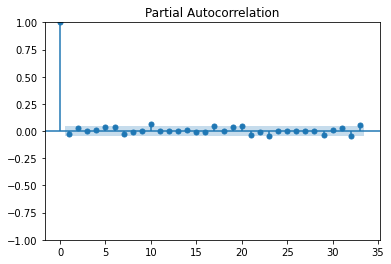

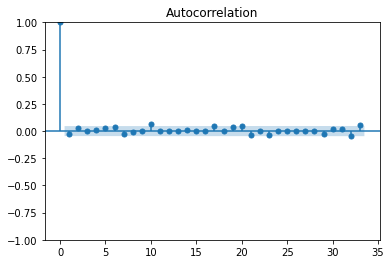

In [29]:
plot_pacf(ar_data['Change']);
plot_acf(ar_data['Change']);

In [30]:
from statsmodels.tsa.ar_model import AutoReg
X=ar_data["Change"]
train_data=X.iloc[:len(X)-100]
test_data=X.iloc[len(X)-100:]
model=AutoReg(train_data, lags=5)
model_fitted=model.fit()
model_fitted.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                 Change   No. Observations:                 1720
Model:                     AutoReg(5)   Log Likelihood                2992.104
Method:               Conditional MLE   S.D. of innovations              0.042
Date:                Thu, 20 Jan 2022   AIC                          -5970.207
Time:                        16:13:46   BIC                          -5932.077
Sample:                             5   HQIC                         -5956.097
                                 1720                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0032      0.001      3.068      0.002       0.001       0.005
Change.L1     -0.0305      0.024     -1.263      0.207      -0.078       0.017
Change.L2      0.0385      0.024      1.595      0.111      -0.009       0.086
Change.L3      0.0007      0.024      0.029      0.977      -0.047       0.048
Change.L4      0.0064      0.024      0.264      0.792      -0.041       0.054
Change.L5      0.0285      0.024      1.181      0.238      -0.019       0.076
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9548           -0.0000j            1.9548           -0.0000
AR.2            0.6148           -1.9913j            2.0841           -0.2023
AR.3            0.6148           +1.9913j            2.0841            0.2023
AR.4           -1.7040           -1.1075j            2.0323           -0.4083
AR.5           -1.7040           +1.1075j            2.0323            0.4083
-----------------------------------------------------------------------------
"""

In [31]:
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)
compare_df=pd.concat([X.tail(100),predictions],axis=1).rename(columns={0:'Predicted'})
compare_df





,Change,Predicted
1720,0.036216,0.004075
1721,0.017006,0.004082
1722,-0.110622,0.003582
1723,-0.015375,0.003623
1724,0.006509,0.003190
...,...,...
1815,-0.056087,0.003324
1816,-0.008995,0.003324
1817,0.044857,0.003324
1818,0.014907,0.003324


In [32]:
score=r2_score(test_data,compare_df["Predicted"])
print('r2 score is: ', score)
print('mean s error is   ',mean_squared_error(test_data,compare_df["Predicted"]))
print('root mean squared error is==',np.sqrt(mean_squared_error(test_data,compare_df["Predicted"])))

r2 score is:  -0.007327362221140499
mean s error is    0.0013041942330259
root mean squared error is== 0.03611362946348511


$R^2$ is close to zero since the predictions are really close to the mean of the model

<AxesSubplot:>

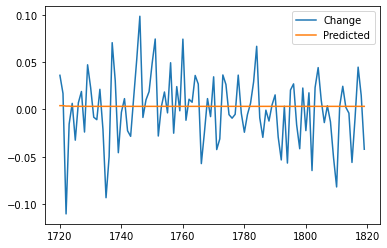

In [33]:
compare_df.plot()

In [34]:
from statsmodels.tsa.arima.model import ARIMA
s=train_data
order3=(3,0,0)
mod=ARIMA(endog=s, order=order3)
res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Change   No. Observations:                 1720
Model:                 ARIMA(3, 0, 0)   Log Likelihood                3002.569
Date:                Thu, 20 Jan 2022   AIC                          -5995.137
Time:                        16:13:49   BIC                          -5967.887
Sample:                             0   HQIC                         -5985.055
                               - 1720                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0033      0.001      3.217      0.001       0.001       0.005
ar.L1         -0.0303      0.017     -1.793      0.073      -0.063       0.003
ar.L2          0.0388      0.021      1.883      0.060      -0.002       0.079
ar.L3          0.0016      0.020      0.080      0.936      -0.038       0.042
sigma2         0.0018   2.98e-05     59.846      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3258.68
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
predictions = res.forecast(100)
predictions.shape
compare_df=pd.concat([test_data,predictions],axis=1).rename(columns={'predicted_mean':'Predicted'})
compare_df


,Change,Predicted
1720,0.036216,0.003900
1721,0.017006,0.003129
1722,-0.110622,0.003340
1723,-0.015375,0.003313
1724,0.006509,0.003320
...,...,...
1815,-0.056087,0.003320
1816,-0.008995,0.003320
1817,0.044857,0.003320
1818,0.014907,0.003320


In [36]:
score=r2_score(test_data,compare_df["Predicted"])
print('r2 score is: ', score)
print('mean s error is   ',mean_squared_error(test_data,compare_df["Predicted"]))
print('root mean squared error is==',np.sqrt(mean_squared_error(test_data,compare_df["Predicted"])))

r2 score is:  -0.007047309390510348
mean s error is    0.0013038316465417553
root mean squared error is== 0.036108609036374625


In [37]:
ar_data

,Date,Close,Change,Up-Down,Log Difference
0,2016-12-15,778.088013,-0.004342,0,-0.004351
1,2016-12-16,784.906982,0.008764,1,0.008726
2,2016-12-17,790.828979,0.007545,1,0.007517
3,2016-12-18,790.530029,-0.000378,0,-0.000378
4,2016-12-19,792.713989,0.002763,1,0.002759
...,...,...,...,...,...
1815,2021-09-12,47672.121090,-0.056087,0,-0.057722
1816,2021-10-12,47243.304690,-0.008995,0,-0.009036
1817,2021-11-12,49362.507810,0.044857,1,0.043880
1818,2021-12-12,50098.335940,0.014907,1,0.014797


Predicting last 100 days of change through choosing optimal AR procedure in each iteration

predicted = 0.003322,   expected = 0.036216,   error = 90.827524  %
predicted = 0.003322,   expected = 0.017006,   error = 80.466528  %
predicted = 0.003322,   expected = -0.110622,   error = -103.002928  %
predicted = 0.003322,   expected = -0.015375,   error = -121.605252  %
predicted = 0.003322,   expected = 0.006509,   error = 48.968522  %
predicted = 0.003322,   expected = -0.032495,   error = -110.222611  %
predicted = 0.003322,   expected = 0.007075,   error = 53.046532  %
predicted = 0.003322,   expected = 0.019066,   error = 82.576938  %
predicted = 0.003322,   expected = -0.023884,   error = -113.908164  %
predicted = 0.003322,   expected = 0.047359,   error = 92.985771  %
predicted = 0.003322,   expected = 0.023015,   error = 85.566717  %
predicted = 0.003322,   expected = -0.008157,   error = -140.722938  %
predicted = 0.003322,   expected = -0.010795,   error = -130.771355  %
predicted = 0.003322,   expected = 0.021386,   error = 84.466704  %
predicted = 0.003322,   expect

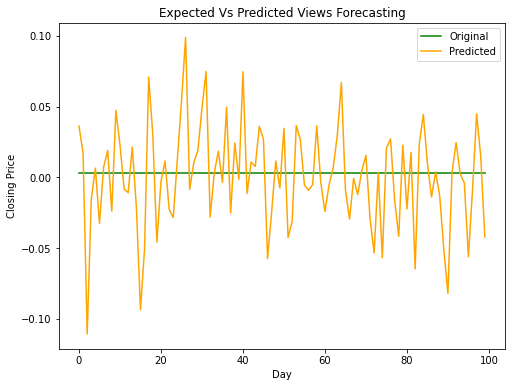

In [38]:
X=ar_data["Change"]
size=rolling_window=int(X.shape[0]-100)

X_train=X[0:size]
X_test=X[size:X.shape[0]]

history = [x for x in X_train]
predictions = list()
originals = list()
error_list = list()


for t in range(100):
    model=ar_select_order(X_train,maxlag=30)
    model_fitted=model.model.fit()
    #print(model_fitted.summary())
    output=model_fitted.forecast()
    pred_value=output

    original_value=X_test.iloc[t]
    history.append(original_value)
    error=(abs(pred_value-original_value)/original_value)*100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    predictions.append(pred_value)
    originals.append(original_value)


plt.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(X_test)-1)]
labels={'Original','Predicted'}
plt.plot( predictions, color= 'green')
plt.plot( originals, color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()
    





In [39]:
core=r2_score(X_test,predictions)
print('r2 score is: ', score)
print('mean s error is   ',mean_squared_error(X_test,predictions))
print('root mean squared error is==',np.sqrt(mean_squared_error(X_test,predictions)))

r2 score is:  -0.007047309390510348
mean s error is    0.001304127306235111
root mean squared error is== 0.036112702837576574


                            AutoReg Model Results                             
Dep. Variable:                 Change   No. Observations:                 1720
Model:                     AutoReg(3)   Log Likelihood                2995.865
Method:               Conditional MLE   S.D. of innovations              0.042
Date:                Thu, 20 Jan 2022   AIC                          -5981.730
Time:                        16:14:20   BIC                          -5954.489
Sample:                             3   HQIC                         -5971.650
                                 1720                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0033      0.001      3.193      0.001       0.001       0.005
Change.L1     -0.0303      0.024     -1.256      0.209      -0.078       0.017
Change.L2      0.0388      0.024      1.607      0.1

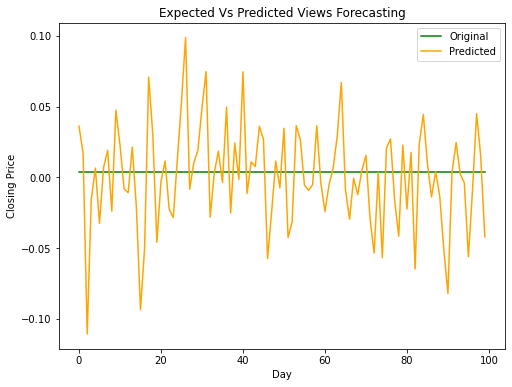

In [40]:
X=ar_data["Change"]
size=rolling_window=int(X.shape[0]-100)

X_train=X[0:size]
X_test=X[size:X.shape[0]]

history = [x for x in X_train]
predictions = list()
originals = list()
error_list = list()


for t in range(100):
    model=AutoReg(X_train,lags=3)
    model_fitted=model.fit()
    print(model_fitted.summary())
    output=model_fitted.forecast()
    pred_value=output

    original_value=X_test.iloc[t]
    history.append(original_value)
    error=(abs(pred_value-original_value)/original_value)*100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    predictions.append(pred_value)
    originals.append(original_value)


plt.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(X_test)-1)]
labels={'Original','Predicted'}
plt.plot( predictions, color= 'green')
plt.plot( originals, color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()
    



                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 1720
Model:                     AutoReg(3)   Log Likelihood              -13930.759
Method:               Conditional MLE   S.D. of innovations            807.943
Date:                Thu, 20 Jan 2022   AIC                          27871.519
Time:                        16:14:22   BIC                          27898.760
Sample:                             3   HQIC                         27881.599
                                 1720                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.5869     26.351      1.009      0.313     -25.060      78.233
Close.L1       0.9419      0.024     39.128      0.000       0.895       0.989
Close.L2       0.1292      0.033      3.920      0.0

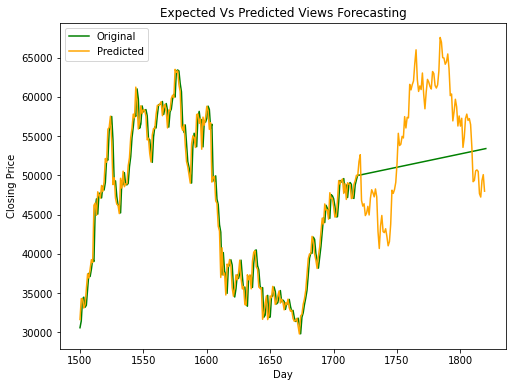

In [41]:
X=ar_data["Close"]
size=rolling_window=int(X.shape[0]-100)

X_train=X[0:size]
X_test=X[size:X.shape[0]]

history = [x for x in X_train]
predictions = list()
originals = list()
error_list = list()

model=AutoReg(X_train,lags=3)
model_fitted=model.fit()
print(model_fitted.summary())
predictions=model_fitted.predict(1500,1820,dynamic=False)



plt.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(X_test)-1)]
labels={'Original','Predicted'}
plt.plot( predictions, color= 'green')
plt.plot( X.iloc[1500:1820], color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()
    

In [42]:
ar_data
x_train,y_train

(          Open    Volume  Time_dummy
 953   0.136467  0.049410    0.523052
 450   0.137422  0.020306    0.246981
 1723  0.693746  0.111365    0.943469
 806   0.046160  0.023484    0.442371
 1487  0.578163  0.250912    0.813941
 ...        ...       ...         ...
 7     0.000256  0.000111    0.003842
 104   0.002948  0.000889    0.057080
 701   0.083506  0.020913    0.384742
 1671  0.490215  0.057132    0.914929
 414   0.139769  0.022743    0.227223
 
 [1367 rows x 3 columns],
 953     0.135264
 450     0.129022
 1723    0.719718
 806     0.046015
 1487    0.599198
           ...   
 7       0.000346
 104     0.004013
 701     0.074273
 1671    0.501017
 414     0.141391
 Name: Close, Length: 1367, dtype: float64)